In [92]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras import models
import numpy as np

max_features = 10000
max_len = 500

x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)

model = models.Sequential()

# [loss, accuracy]
# Dense model achieved a score of [0.291025115442276, 0.87948]
'''
model.add(layers.Embedding(max_features, 8, input_length = max_len))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dropout(0.5))
'''

# Convolutional model achieved a score of [0.3701916217184067, 0.85116]
model.add(layers.Embedding(max_features, 32, input_length = max_len))
model.add(layers.Conv1D(32, 4, activation = 'relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(32, 4, activation = 'relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(32, 4, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())

model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(x_train,
                   y_train,
                   epochs = 5,
                   batch_size = 128,
                   validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 11s 559us/step - loss: 0.5728 - acc: 0.6739 - val_loss: 0.3788 - val_acc: 0.8330
Epoch 2/5
20000/20000 [==============================] - 6s 310us/step - loss: 0.3256 - acc: 0.8623 - val_loss: 0.3409 - val_acc: 0.8552
Epoch 3/5
20000/20000 [==============================] - 6s 323us/step - loss: 0.2547 - acc: 0.8972 - val_loss: 0.3305 - val_acc: 0.8646
Epoch 4/5
20000/20000 [==============================] - 6s 324us/step - loss: 0.2109 - acc: 0.9182 - val_loss: 0.3960 - val_acc: 0.8416
Epoch 5/5
20000/20000 [==============================] - 7s 325us/step - loss: 0.1794 - acc: 0.9313 - val_loss: 0.3536 - val_acc: 0.8604


In [93]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 6s 238us/step


[0.3701916217184067, 0.85116]

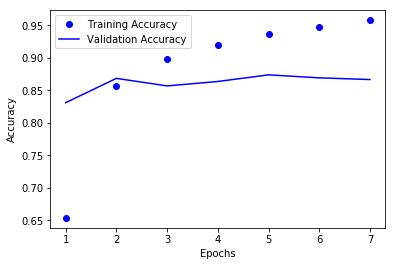

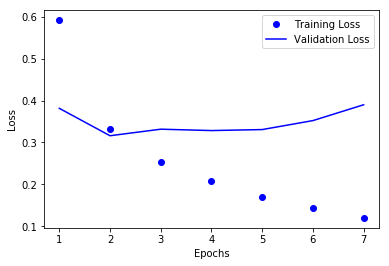

In [91]:
import matplotlib.pyplot as plt

history_dict = history.history
epochs = len(history_dict['acc'])

val_acc = history_dict['val_acc']
acc = history_dict['acc']
val_loss = history_dict['val_loss']
loss = history_dict['loss']

plt.plot(range(1, epochs+1), acc, 'bo', label = 'Training Accuracy')
plt.plot(range(1, epochs+1), val_acc, 'b', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.clf()
plt.plot(range(1, epochs+1), loss, 'bo', label = 'Training Loss')
plt.plot(range(1, epochs+1), val_loss, 'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()